# Definições

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=08f006a684752cd334ee520112e2ff1e18721fe180bd7140b763f5f2d06aed8e
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 54.1 MB/s eta 0:00:00


In [ ]:
from qiskit import *
from  qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy
import qiskit

import pylatexenc

In [ ]:
from qiskit.circuit import Parameter, ParameterVector

# Circuito

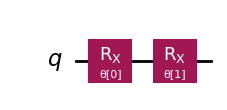

In [ ]:
param_0 = Parameter('θ[0]')
param_1 = Parameter('θ[1]')
circuit = QuantumCircuit(1)
circuit.rx(theta = param_0, qubit = 0)
circuit.rx(theta = param_1, qubit = 0)
circuit.draw('mpl')

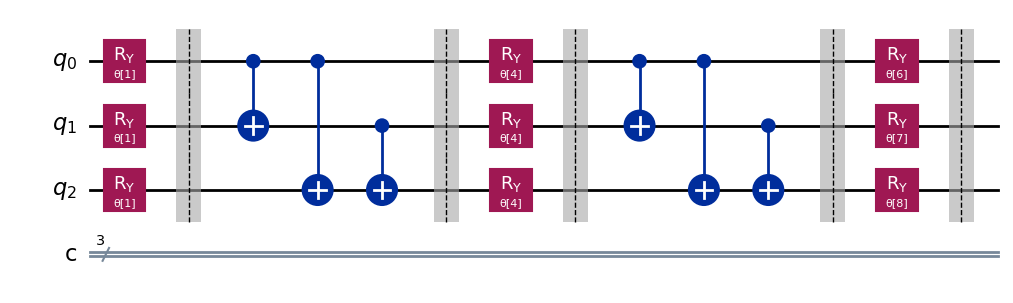

In [ ]:
n=3
nlayers=2

parameters = ParameterVector('θ', n*(nlayers+1))

circuit2 = QuantumCircuit(n,n)
for layer in range(nlayers):
  for i in range(n):
    circuit2.ry(parameters[n*layer+1],i)
  circuit2.barrier()
  for i in range(n):
    for j in range(i):
      circuit2.cx(j,i)
  circuit2.barrier()

for i in range(n):
  circuit2.ry(parameters[n*nlayers+i], i)
circuit2.barrier()

circuit2.draw('mpl')

In [ ]:
param_dict = {parameter: numpy.random.random() for parameter in parameters}
print(param_dict)
new_circuit = circuit.assign_parameters(parameters = param_dict)
new_circuit.draw('mpl')

{ParameterVectorElement(θ[0]): 0.8126627959931902, ParameterVectorElement(θ[1]): 0.7394943952101956, ParameterVectorElement(θ[2]): 0.2882581376125065, ParameterVectorElement(θ[3]): 0.7054717805334156, ParameterVectorElement(θ[4]): 0.10929355514961814, ParameterVectorElement(θ[5]): 0.6989469607544274, ParameterVectorElement(θ[6]): 0.3749036050151995, ParameterVectorElement(θ[7]): 0.02731318666191873, ParameterVectorElement(θ[8]): 0.3732228108082002}


CircuitError: 'Cannot bind parameters (θ[0], θ[7], θ[6], θ[8], θ[5], θ[2], θ[3], θ[4], θ[1]) not present in the circuit.'